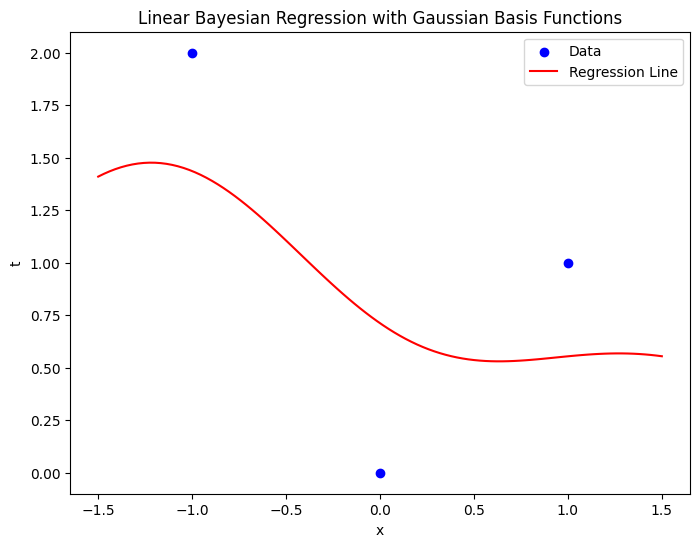

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data input (x) dan target (t)
x = np.array([1, 0, -1])
t = np.array([1, 0, 2])

# Jumlah basis Gaussian
num_basis_functions = 3

# Parameter lebar basis Gaussian
sigma = 1.0

# Pusat basis Gaussian
mu = np.linspace(-1, 1, num_basis_functions)

# Matriks desain
design_matrix = np.zeros((len(x), num_basis_functions))
for i in range(len(x)):
    for j in range(num_basis_functions):
        design_matrix[i, j] = np.exp(-(x[i] - mu[j])**2 / (2 * sigma**2))

# Hyperparameter alpha dan beta
alpha = 0.1  # Presisi prior untuk bobot
beta = 1.0  # Presisi noise

# Perhitungan posterior
S_N_inv = alpha * np.identity(num_basis_functions) + beta * np.dot(design_matrix.T, design_matrix)
S_N = np.linalg.inv(S_N_inv)
m_N = beta * np.dot(np.dot(S_N, design_matrix.T), t)

# Prediksi untuk data baru (contoh: titik-titik di antara -1 dan 1)
x_new = np.linspace(-1.5, 1.5, 100)
design_matrix_new = np.zeros((len(x_new), num_basis_functions))
for i in range(len(x_new)):
    for j in range(num_basis_functions):
        design_matrix_new[i, j] = np.exp(-(x_new[i] - mu[j])**2 / (2 * sigma**2))

# Prediksi menggunakan mean posterior
predictions = np.dot(design_matrix_new, m_N)

# Menampilkan grafik
plt.figure(figsize=(8, 6))
plt.scatter(x, t, color='blue', label='Data')
plt.plot(x_new, predictions, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Linear Bayesian Regression with Gaussian Basis Functions')
plt.legend()
plt.show()
